In [1]:
import pickle
import numpy as np

In [2]:
with open("test_qa.txt", "rb") as fp:
    train_data =  pickle.load(fp)

In [3]:
with open("test_qa.txt", "rb") as fp:
    test_data =  pickle.load(fp)

In [4]:
type(test_data)

list

In [5]:
type(train_data)

list

In [6]:
len(test_data)

1000

In [7]:
len(train_data)

1000

In [8]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [9]:
train_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [10]:
train_data[3]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'discarded',
  'the',
  'milk',
  '.',
  'John',
  'went',
  'to',
  'the',
  'garden',
  '.',
  'Daniel',
  'moved',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'to',
  'the',
  'garden',
  '.',
  'Daniel',
  'travelled',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'travelled',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
 'yes')

In [11]:
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [12]:
' '.join(train_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [13]:
' '.join(train_data[0][1])

'Is John in the kitchen ?'

In [14]:
train_data[0][2]

'no'

In [15]:
vocab = set()

In [16]:
all_data = test_data + train_data

In [17]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [18]:
vocab.add('no')
vocab.add('yes')

In [19]:
vocab


{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [20]:
vocab_len = len(vocab) + 1

In [21]:
vocab_len

38

In [22]:
max_story_len = max([len(data[0]) for data in all_data])

In [23]:
max_story_len

86

In [24]:
max_question_len = max([len(data[1]) for data in all_data])

In [25]:
max_question_len

6

In [26]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [27]:
vocab_size = len(vocab) + 1

In [28]:
len(vocab)

37

In [29]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [30]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [31]:
tokenizer.word_index

{'.': 37,
 '?': 16,
 'apple': 23,
 'back': 18,
 'bathroom': 25,
 'bedroom': 14,
 'daniel': 24,
 'discarded': 15,
 'down': 3,
 'dropped': 7,
 'football': 12,
 'garden': 17,
 'got': 20,
 'grabbed': 2,
 'hallway': 29,
 'in': 6,
 'is': 33,
 'john': 34,
 'journeyed': 9,
 'kitchen': 22,
 'left': 11,
 'mary': 36,
 'milk': 10,
 'moved': 19,
 'no': 4,
 'office': 32,
 'picked': 27,
 'put': 5,
 'sandra': 13,
 'the': 35,
 'there': 8,
 'to': 31,
 'took': 21,
 'travelled': 28,
 'up': 30,
 'went': 1,
 'yes': 26}

In [32]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [33]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [34]:
len(train_story_text)

1000

In [35]:
len(train_story_seq)

1000

In [36]:
s = [[51]]
pad_sequences(s,10)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0, 51]], dtype=int32)

In [37]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
  X = []
  Xq = []
  Y = []
    
    
  for story, query, answer in data:
        
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]

        y = np.zeros(len(word_index) + 1)

        y[word_index[answer]] = 1

        X.append(x)
        Xq.append(xq)
        Y.append(y)

  return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [38]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [39]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [40]:
inputs_test

array([[ 0,  0,  0, ..., 35, 14, 37],
       [ 0,  0,  0, ..., 35, 17, 37],
       [ 0,  0,  0, ..., 35, 17, 37],
       ...,
       [ 0,  0,  0, ..., 35, 23, 37],
       [ 0,  0,  0, ..., 35, 17, 37],
       [ 0,  0,  0, ..., 23,  8, 37]], dtype=int32)

In [41]:
queries_test

array([[33, 34,  6, 35, 22, 16],
       [33, 34,  6, 35, 22, 16],
       [33, 34,  6, 35, 17, 16],
       ...,
       [33, 36,  6, 35, 14, 16],
       [33, 13,  6, 35, 17, 16],
       [33, 36,  6, 35, 17, 16]], dtype=int32)

In [42]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
sum(answers_test)

array([  0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [44]:
tokenizer.word_index['yes']

26

In [45]:
tokenizer.word_index['no']

4

In [46]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [47]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [48]:
print(input_sequence,';',question,';',vocab_size)

KerasTensor(type_spec=TensorSpec(shape=(None, 86), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'") ; KerasTensor(type_spec=TensorSpec(shape=(None, 6), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'") ; 38


In [49]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [50]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [51]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [52]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [53]:
input_encoded_m

<KerasTensor: shape=(None, 86, 64) dtype=float32 (created by layer 'sequential')>

In [54]:
question_encoded

<KerasTensor: shape=(None, 6, 64) dtype=float32 (created by layer 'sequential_2')>

In [55]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match

<KerasTensor: shape=(None, 86, 6) dtype=float32 (created by layer 'dot')>

In [56]:
match = Activation('softmax')(match)
match

<KerasTensor: shape=(None, 86, 6) dtype=float32 (created by layer 'activation')>

In [57]:
response = add([match, input_encoded_c])
response

<KerasTensor: shape=(None, 86, 6) dtype=float32 (created by layer 'add')>

In [58]:
response = Permute((2, 1))(response)
response

<KerasTensor: shape=(None, 6, 86) dtype=float32 (created by layer 'permute')>

In [59]:
answer = concatenate([response, question_encoded])

In [60]:
answer

<KerasTensor: shape=(None, 6, 150) dtype=float32 (created by layer 'concatenate')>

In [61]:
answer = LSTM(32)(answer)

In [62]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [63]:
answer = Activation('softmax')(answer)
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 86)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
______________________________________________________________________________________________

In [65]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=20,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/20
32/32 [==============================] - 3s 30ms/step - loss: 2.2481 - accuracy: 0.4230 - val_loss: 1.0721 - val_accuracy: 0.5030
Epoch 2/20
32/32 [==============================] - 0s 11ms/step - loss: 1.1152 - accuracy: 0.4860 - val_loss: 0.7916 - val_accuracy: 0.5030
Epoch 3/20
32/32 [==============================] - 0s 11ms/step - loss: 0.9329 - accuracy: 0.4870 - val_loss: 0.7373 - val_accuracy: 0.4970
Epoch 4/20
32/32 [==============================] - 0s 11ms/step - loss: 0.8348 - accuracy: 0.5060 - val_loss: 0.7123 - val_accuracy: 0.5030
Epoch 5/20
32/32 [==============================] - 0s 12ms/step - loss: 0.8268 - accuracy: 0.5000 - val_loss: 0.7045 - val_accuracy: 0.4970
Epoch 6/20
32/32 [==============================] - 0s 12ms/step - loss: 0.7713 - accuracy: 0.5170 - val_loss: 0.7181 - val_accuracy: 0.5030
Epoch 7/20
32/32 [==============================] - 0s 12ms/step - loss: 0.7560 - accuracy: 0.5080 - val_loss: 0.6963 - val_accuracy: 0.5030
Epoch 8/20
32

In [66]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


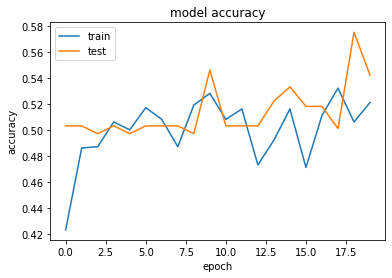

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

In [69]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [70]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [71]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [72]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [73]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.53536344


In [74]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [75]:
my_story = "Sandra dropped the football . Mary discarded the apple in the kitchen ."
my_story.split()

['Sandra',
 'dropped',
 'the',
 'football',
 '.',
 'Mary',
 'discarded',
 'the',
 'apple',
 'in',
 'the',
 'kitchen',
 '.']

In [76]:
my_question = "Is Apple in the kitchen ?"

In [77]:
my_question.split()

['Is', 'Apple', 'in', 'the', 'kitchen', '?']

In [78]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [79]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [80]:
pred_results = model.predict(([ my_story, my_ques]))

In [81]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.51749545
